# Enter any user id, his Top 5 pratilipi recomendations will be made.
For more clarity Check the examples in the end for how to recommend

#Import Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
from numpy.linalg import eigh,norm
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
MetaData = "/content/drive/MyDrive/Pratilipi_Assessment/metadata.csv"
df1 = pd.read_csv(MetaData )
df1.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


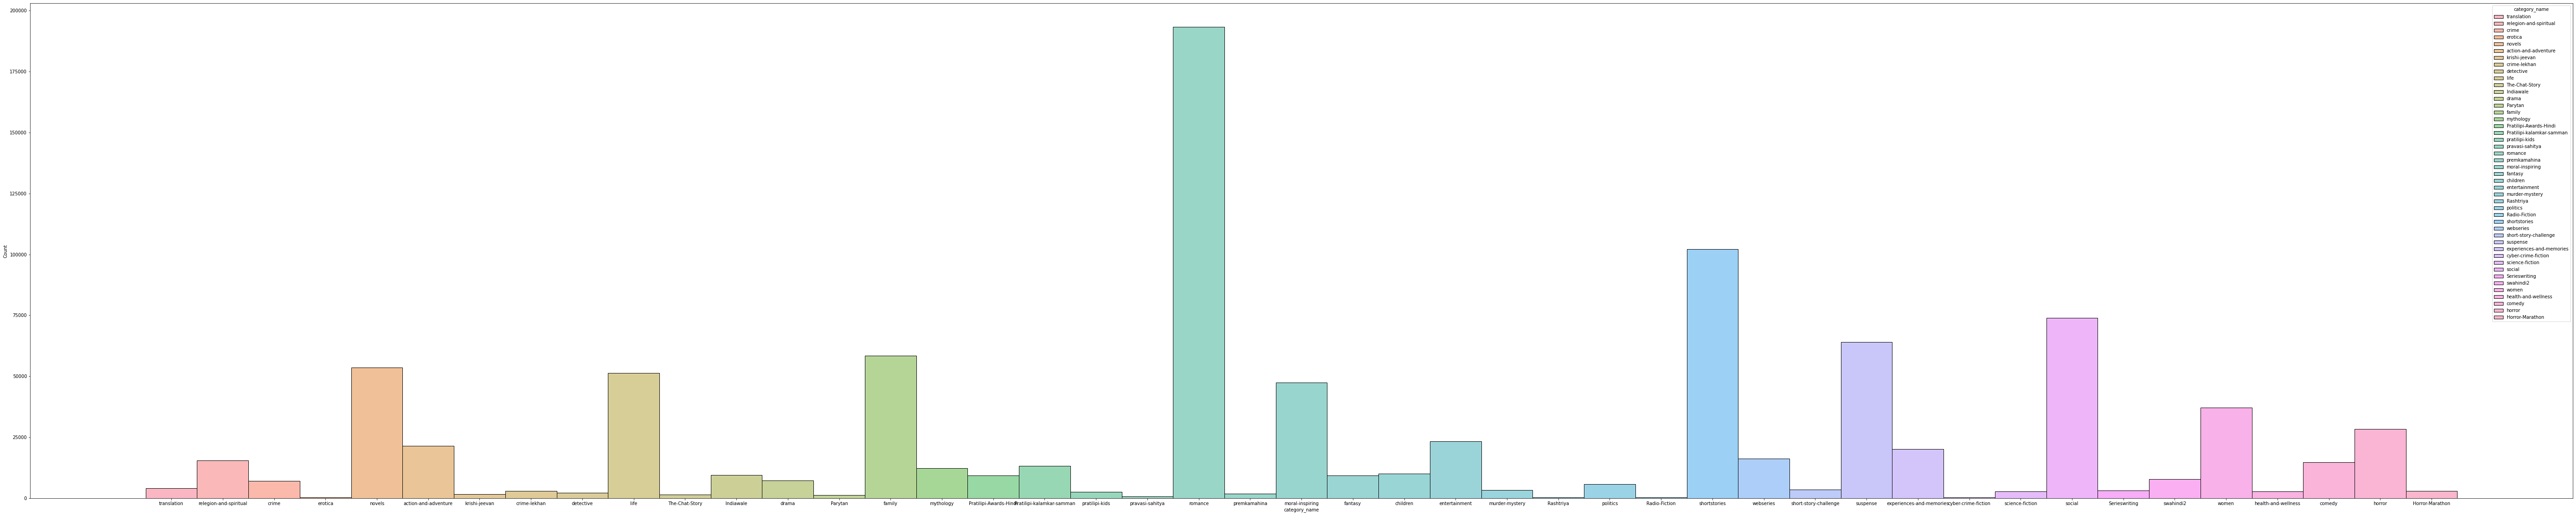

In [ ]:
plt.figure(figsize=(100,20)) 
display(sns.histplot(x = 'category_name',data = df1, kde= True, hue = 'category_name'))



In [ ]:
user_interactions = "/content/drive/MyDrive/Pratilipi_Assessment/user-interactions.csv"
df2 = pd.read_csv(user_interactions)
df2.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


#Merge two dataframes

In [ ]:
df2.merge(df1[["pratilipi_id", "category_name"]])

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at,category_name
0,9999999,5506791964450228,1377786228203072,100.0,2022-03-18 15:14:41.771,novels
1,9999999,5506791964450228,1377786228203072,100.0,2022-03-18 15:14:41.771,romance
2,9999999,5506791964450228,1377786228203072,100.0,2022-03-18 15:14:41.771,swahindi2
3,9996215,5506791987808938,1377786228203072,100.0,2022-03-18 15:16:58.895,novels
4,9996215,5506791987808938,1377786228203072,100.0,2022-03-18 15:16:58.895,romance
...,...,...,...,...,...,...
31942,9980005,5506791964812694,1377786226180426,100.0,2022-03-18 15:26:37.321,women
31943,9980004,5506791969783821,1377786215500470,100.0,2022-03-18 15:26:37.340,family
31944,9980004,5506791969783821,1377786215500470,100.0,2022-03-18 15:26:37.340,shortstories
31945,9980004,5506791969783821,1377786215500470,100.0,2022-03-18 15:26:37.340,social


#Data Cleaning And Analysis


In [ ]:
print(df2.shape)
df2.info()
df2.describe()


(10000000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   user_id       int64  
 2   pratilipi_id  int64  
 3   read_percent  float64
 4   updated_at    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 381.5+ MB


,Unnamed: 0,user_id,pratilipi_id,read_percent
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.000000e+06,5.489158e+15,1.369415e+15,9.325429e+01
std,2.886751e+06,1.605679e+14,1.221880e+14,2.163297e+01
min,0.000000e+00,3.255388e+15,-5.375941e+15,0.000000e+00
25%,2.500000e+06,5.506792e+15,1.377786e+15,1.000000e+02
50%,5.000000e+06,5.506792e+15,1.377786e+15,1.000000e+02
75%,7.499999e+06,5.506792e+15,1.377786e+15,1.000000e+02
max,9.999999e+06,5.506792e+15,1.377786e+15,2.400000e+03


In [ ]:
print('Null value in dataset', df2.isnull().any().sum())

Null value in dataset 0


In [ ]:
print("No. of Duplicate rows", df2.duplicated().sum())

No. of Duplicate rows 0


In [ ]:
df2 = df2.sort_values("updated_at")
df2.drop(["Unnamed: 0"], axis= 1)

,user_id,pratilipi_id,read_percent,updated_at
9999999,5506791964450228,1377786228203072,100.0,2022-03-18 15:14:41.771
9999998,5506791960526245,1377786216689875,100.0,2022-03-18 15:14:41.777
9999997,5506791954036110,1377786225804654,100.0,2022-03-18 15:14:41.827
9999996,5506791970542005,1377786228178674,100.0,2022-03-18 15:14:41.924
9999995,5506791962779331,1377786223645432,38.0,2022-03-18 15:14:41.973
...,...,...,...,...
9980004,5506791969783821,1377786215500470,100.0,2022-03-18 15:26:37.340
9980003,5506791964679140,1377786225106921,100.0,2022-03-18 15:26:37.409
9980002,5506791949182802,1377786216258278,86.0,2022-03-18 15:26:37.417
9980001,5506791963659218,1377786223769386,14.0,2022-03-18 15:26:37.424


#Spliting dataset in Training data and Testing data

In [ ]:
#Taking top 15000 for train, and 5000 for test data as Datset is very large consist of 1000000 unique user_id
df2 = df2.iloc[:20000,0:]
train_data, test_data = train_test_split(df2, test_size = 0.25, random_state=0)
df3 = train_data
df3.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
9983847,9983847,5506791992036610,1377786221552002,100.0,2022-03-18 15:24:22.026
9982231,9982231,5506791957212281,1377786226459585,100.0,2022-03-18 15:25:18.624
9980507,9980507,5506791983402614,1377786227350111,100.0,2022-03-18 15:26:20.117
9984202,9984202,5506791968153304,1377786226364033,99.0,2022-03-18 15:24:09.915
9993333,9993333,5506791956199950,1377786224591571,100.0,2022-03-18 15:18:39.936


In [ ]:
print("Training data shape", train_data.shape)
print("Test data shape", test_data.shape)

Training data shape (15000, 5)
Test data shape (5000, 5)


#Model Building - Using Collaborative Filtering

In [ ]:
# Matrix with row per 'user' and column per 'pratilipi' 

#Taking subset of the dataset

df3 = df3.pivot(index = 'user_id', columns ='pratilipi_id', values = 'read_percent').fillna(0)
df3.head()

pratilipi_id,-5375939687432735,-5375939686922330,-873380518390072,-868050740275512,-862174547634488,-821302225365304,-820284227938616,-774166075500856,-770903646759224,-751626048858424,...,1377786228303908,1377786228303959,1377786228304090,1377786228304154,1377786228304193,1377786228304216,1377786228304217,1377786228304253,1377786228304256,1377786228304340
user_id,,,,,,,,,,,,,,,,,,,,,
3267248272614052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3300962971067044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3326567230382756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3354217315476132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3369300870996644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('Shape of Matrix: ', df3.shape)
df3['index'] = np.arange(0, df3.shape[0],1)
df3.set_index(['index'], inplace = True)
df3


Shape of Matrix:  (7936, 12472)


pratilipi_id,-5375939687432735,-5375939686922330,-873380518390072,-868050740275512,-862174547634488,-821302225365304,-820284227938616,-774166075500856,-770903646759224,-751626048858424,...,1377786228303908,1377786228303959,1377786228304090,1377786228304154,1377786228304193,1377786228304216,1377786228304217,1377786228304253,1377786228304256,1377786228304340
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As this is sparse matrix i will use SVD to decrese no. of rows and coloums, only rows having value will be fed to the model

#SVD


In [ ]:
# Singular Value Decomposition
U, sigma, Vt = svds(df3, k = 7)

In [ ]:

print('Left singular matrix: \n',U)

Left singular matrix: 
 [[-2.09282033e-19 -3.63518763e-19  5.04314865e-19 ... -6.02690909e-19
  -4.81506971e-19 -5.61790341e-20]
 [ 2.60004552e-22 -5.90307247e-22  1.93981448e-21 ... -2.18802299e-21
  -1.94964357e-21 -1.18105921e-22]
 [-1.15600567e-17  2.13267219e-17  6.78102108e-18 ... -1.46257987e-18
  -3.75573404e-18 -5.16239576e-18]
 ...
 [-2.72552181e-19  6.47452033e-19 -2.44053720e-18 ... -3.37100843e-19
   1.55708642e-18  5.81874153e-19]
 [-3.21056490e-19 -3.27730768e-18  4.31833133e-18 ...  1.05371221e-18
  -3.66322739e-18 -2.75298882e-18]
 [-5.14328798e-19 -1.02758178e-18  3.81677825e-19 ...  4.01323586e-19
   3.26968020e-19 -5.91370450e-19]]


In [ ]:
print('Sigma: \n',sigma)

Sigma: 
 [525.40424082 534.56794785 541.80217914 543.58620605 579.94103765
 622.13378395 719.92945801]


As sigma is not a diagonal matrix we have to convert it into diagonal matrix.

In [ ]:
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[525.40424082   0.           0.           0.           0.
    0.           0.        ]
 [  0.         534.56794785   0.           0.           0.
    0.           0.        ]
 [  0.           0.         541.80217914   0.           0.
    0.           0.        ]
 [  0.           0.           0.         543.58620605   0.
    0.           0.        ]
 [  0.           0.           0.           0.         579.94103765
    0.           0.        ]
 [  0.           0.           0.           0.           0.
  622.13378395   0.        ]
 [  0.           0.           0.           0.           0.
    0.         719.92945801]]


In [ ]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[ 0.00000000e+00  0.00000000e+00 -9.26554304e-20 ...  5.82619488e-19
   5.88400438e-19  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.28977015e-19 ...  4.51446467e-18
   1.26702964e-18  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.62714228e-20 ...  4.66392666e-20
  -4.93090659e-19  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.40926520e-20 ...  5.22127856e-12
   3.30476539e-19  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -7.78505379e-20 ... -1.03077184e-14
  -9.43665962e-19  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.67945066e-20 ...  1.48957897e-17
  -3.93106756e-19  0.00000000e+00]]


In [ ]:
#Predicted read percentage
predicted_read_percent = np.dot(np.dot(U, sigma), Vt) 

# Convert Predicted read percentage to dataframe
preds_df = pd.DataFrame(predicted_read_percent, columns = df3.columns)
preds_df.head()

pratilipi_id,-5375939687432735,-5375939686922330,-873380518390072,-868050740275512,-862174547634488,-821302225365304,-820284227938616,-774166075500856,-770903646759224,-751626048858424,...,1377786228303908,1377786228303959,1377786228304090,1377786228304154,1377786228304193,1377786228304216,1377786228304217,1377786228304253,1377786228304256,1377786228304340
0,0.0,0.0,1.521826e-34,1.649550e-34,1.387861e-34,2.014612e-34,-5.478784e-34,-1.247324e-34,-2.224517e-34,9.252406e-34,...,3.411007e-35,5.604560e-34,-1.047136e-33,-1.324842e-34,6.671046e-34,3.031841e-34,-1.324842e-34,-1.775671e-27,-5.719108e-34,0.0
1,0.0,0.0,3.736695e-37,6.766692e-37,3.501120e-37,5.968565e-37,-1.460847e-36,3.431070e-37,-6.716213e-37,2.334080e-36,...,4.418740e-38,1.510195e-36,-4.825678e-36,-8.253695e-38,5.471975e-37,8.305319e-37,-8.253695e-38,-6.516937e-30,-7.214210e-37,0.0
2,0.0,0.0,4.144599e-33,1.695303e-32,1.837114e-33,2.933081e-33,-4.605999e-33,7.471170e-33,-4.253309e-33,1.224743e-32,...,-1.399506e-34,4.998140e-33,1.063048e-32,3.428140e-33,-1.388597e-32,2.855249e-33,3.428140e-33,-3.836391e-27,8.641120e-33,0.0
3,0.0,0.0,-3.626050e-34,-5.449444e-34,-3.192425e-34,-5.297390e-34,1.345270e-33,-2.853763e-35,5.877077e-34,-2.128284e-33,...,-6.071991e-35,-1.383019e-33,3.350685e-33,1.850040e-34,-9.890504e-34,-7.541111e-34,1.850040e-34,4.629927e-27,9.645179e-34,0.0
4,0.0,0.0,-4.454604e-34,-8.938097e-34,6.414298e-34,-2.390243e-34,6.203098e-34,-3.512250e-33,4.929254e-34,4.276198e-33,...,2.303793e-34,-3.338306e-34,-2.036795e-32,-2.400388e-33,6.575314e-33,-2.404939e-34,-2.400388e-33,-1.895348e-26,-4.782796e-33,0.0


#Defining Final function to deduce the the recommendations 

In [ ]:
def recommend_items(userID, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    #Getting desired tuple
    sorted_user_predictions = preds_df.iloc[user_idx]
    #Sorting results as per user predictions
    sorted_user_predictions = sorted_user_predictions.sort_values(ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(*sorted_user_predictions.head(num_recommendations).index)

#Getting  top - K ( K = 5) recommendations any user 

All the readers have been recommended different partilipis in order of  higher to lower

In [ ]:
userID = 3
num_recommendations = 5
recommend_items(userID, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 3):

1377786228227774 1377786225037710 1377786225062915 1377786225079346 1377786225187636


In [ ]:
userID = 1859
num_recommendations = 5
recommend_items(userID, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 1859):

1377786228227774 1377786228221391 1377786228075813 1377786228075715 1377786228107536


In [ ]:
userID = 6488
num_recommendations = 5
recommend_items(userID, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6488):

1377786217536772 1377786223446174 1377786216295001 1377786216272925 1377786216305007
